<h2 align='center' style='color:purple'>Outlier detection and removal using z-score and standard deviation in python pandas</h2>

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

**We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple**

https://www.kaggle.com/mustafaali96/weight-height

In [4]:
df = pd.read_csv("heights.csv")
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot:>

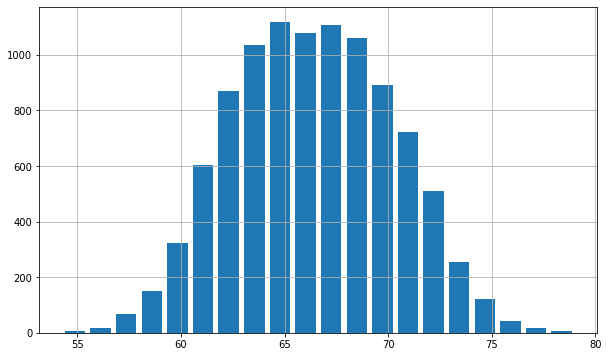

In [7]:
df.height.hist(bins=20, rwidth=0.8)

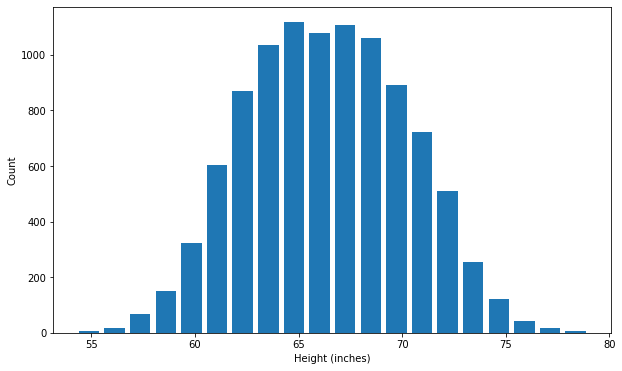

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Read this awesome article to get your fundamentals clear on normal distribution, bell curve and standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html

**Plot bell curve along with histogram for our dataset**

In [8]:
df.height.mean()

66.367559754866

In [9]:
df.height.std()

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84. 

<h3 style='color:blue'>(1) Outlier detection and removal using 3 standard deviation</h3>

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [11]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [12]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

Here are the outliers that are beyond 3 std dev from mean

In [13]:
df[(df.height>upper_limit) | (df.height<lower_limit)]   #select * from df where height <= upper_limit and height >= lower_limit

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points.
Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

**Now remove these outliers and generate new dataframe**

In [14]:
df_no_outlier_std_dev = df[(df.height<=upper_limit) & (df.height>=lower_limit)]
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [12]:
df_no_outlier_std_dev.shape

(9993, 2)

In [13]:
df.shape

(10000, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

**Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

<h3 style='color:purple'>Calculate the Z Score</h3>

<img align='left' height="400" width="300" src="zscore.png" />

In [15]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [15]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [14]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [16]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Here is the list of all outliers 

In [17]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


<h3 style='color:purple'>Remove the outliers and produce new dataframe</h3>

In [28]:
df.zscore

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: zscore, Length: 10000, dtype: float64

In [19]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [20]:
df_no_outliers.shape

(9993, 3)

In [21]:
df.shape

(10000, 3)

### IQR Method

In [22]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620480000005, 69.17426172750001)

In [23]:
IQR = Q3-Q1
IQR

5.668641247500005

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265860875, 77.67722359875002)

In [25]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027
